# Description:
- One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.
- Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.
# Acknowledgements
- The dataset is taken from Kaggle.
### Objective:
-	Understand the Dataset & cleanup (if required).
-	Build Regression models to predict the sales w.r.t single & multiple features.
-	Also evaluate the models & compare their respective scores like R2, RMSE, etc.


# Understanding the dataset and stating our hypothesis
- The main task is to be build a predictive model for the Walmart sales using the 8 variables or predictors given. Now the question is, which of the independent variables or predictors have a huge influence on the dependent variable weekly sales. It is obvious that holidays contributes to the sales that is, during holidays customers buy lot of items thereby increasing sales therefore stores must be stocked up in order not to run out.
- Our first hypothesis is, does these independent variables or predictors have influence on sales that is the dependent or target variable which will enable us to make better decisions so to prevent running out of stock.
- The second hypothesis states that the predictors or independent variables have a high chance of giving us a good predictive model in predicting sales. The independent variables are all economic indicators that affects sales. For instance, the location of a store plays a major role in sales.

In [1]:
# We begin by importing all the necessary libraries needed
import pandas as pd
import numpy as np
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt
%matplotlib inline

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

#import statsmodels.api as sm
#from statsmodels.formula.api import ols

#ignore warning
import warnings
warnings.filterwarnings("ignore")

C:\Users\Nana Tieku\AppData\Roaming\Python\Python38\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.8, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
C:\Users\Nana Tieku\AppData\Roaming\Python\Python38\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


# Loading Data

In [2]:
df = pd.read_csv("data/walmart.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
# Finding information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


## We start our data cleaning from here

In [4]:
# converting date object to datetime
df['Date'] = pd.to_datetime(df.Date)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
# Reframing the columns by breaking the date into weeks, month and year for analysis

df['weekday'] = df.Date.dt.weekday
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year

df.drop(['Date'], axis=1, inplace=True)#,'month'

target = 'Weekly_Sales'
features = [i for i in df.columns if i not in [target]]
original_df = df.copy(deep=True)

df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


In [6]:
# Checking for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   weekday       6435 non-null   int64  
 8   month         6435 non-null   int64  
 9   year          6435 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 502.9 KB


In [7]:
# checking for unique values
df.nunique()

Store             45
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
weekday            7
month             12
year               3
dtype: int64

In [8]:
# Checking for missing values in each column
df.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
weekday         0
month           0
year            0
dtype: int64

# Business Analytics and Visualization

In [9]:
# Finding the total sales
df.Weekly_Sales.sum()

6737218987.11

In [10]:
# The stores with the highest weekly sales
df.groupby(['Store'])['Weekly_Sales'].sum().sort_values(ascending=False).head(5)

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='Store'>

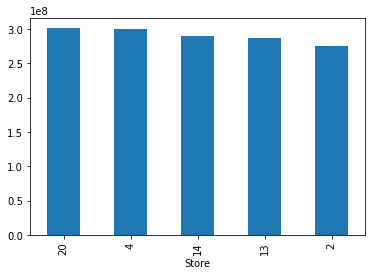

In [11]:
# The stores with the highest weekly sales visualization
df.groupby(['Store'])['Weekly_Sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar')

- Store number 20 had the highest sales

In [12]:
# The stores with the lowest weekly sales
df.groupby(['Store'])['Weekly_Sales'].sum().sort_values(ascending=False).tail(5)

Store
38    55159626.42
36    53412214.97
5     45475688.90
44    43293087.84
33    37160221.96
Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='Store'>

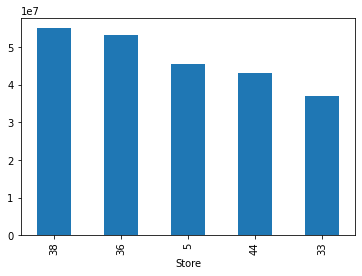

In [13]:
# The stores with the lowest sales
df.groupby(['Store'])['Weekly_Sales'].sum().sort_values(ascending=False).tail(5).plot(kind='bar')

- Store number 38 had the lowest sales

<AxesSubplot:xlabel='year'>

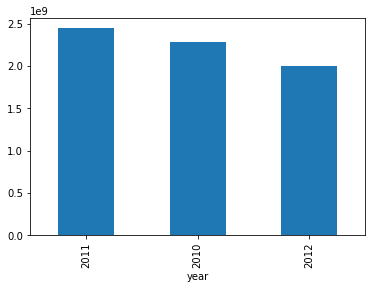

In [14]:
# The year with the highest sales
df.groupby(['year'])['Weekly_Sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar')

<AxesSubplot:xlabel='year'>

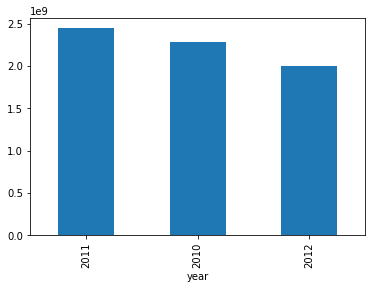

In [15]:
# The year with the lowest sales
df.groupby(['year'])['Weekly_Sales'].sum().sort_values(ascending=False).tail(5).plot(kind='bar')

# Data Exploration and Visualization

In [16]:
# Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01
weekday,6435.0,3.573427e+00,1.426581,0.000,4.000,4.000000,4.000000e+00,6.000000e+00
month,6435.0,6.475524e+00,3.321797,1.000,4.000,6.000000,9.000000e+00,1.200000e+01
year,6435.0,2.010965e+03,0.797019,2010.000,2010.000,2011.000000,2.012000e+03,2.012000e+03


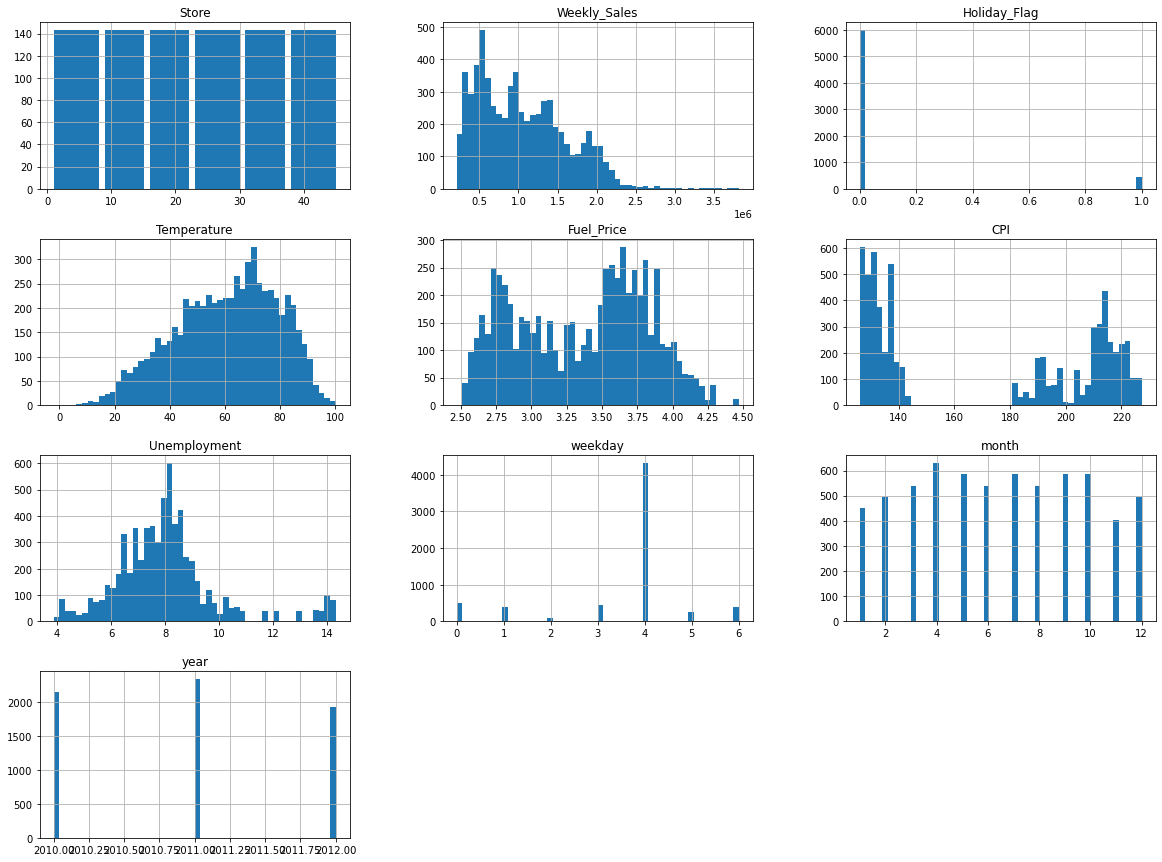

In [17]:
# Histogram for all columns
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

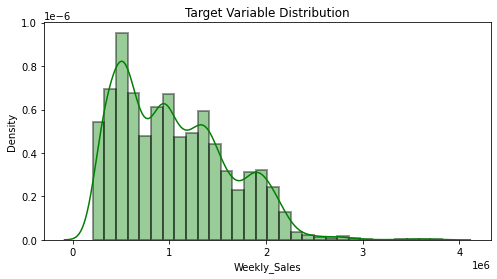

In [18]:
#Let us analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution')
plt.show()

- We have a positive skewed distribution for sales since the tail is on the right side of the histogram. As we can see, most of the values are clustered to the left side of the x-axis

In [19]:
# Correlation Analysis
df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531,-2.243183e-15,6.289676e-16,3.474318e-12
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176,-2.104085e-02,6.753523e-02,-1.837754e-02
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960,-9.100474e-02,3.322341e-01,-5.678257e-02
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158,1.833136e-02,6.643970e-02,6.426923e-02
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684,-2.651216e-02,-5.283174e-02,7.794703e-01
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020,-9.595877e-03,1.478843e-03,7.479573e-02
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000,3.777320e-02,-2.061552e-03,-2.418135e-01
weekday,-2.243183e-15,-0.021041,-9.100474e-02,0.018331,-0.026512,-0.009596,0.037773,1.000000e+00,-1.387259e-01,-9.923791e-02
month,6.289676e-16,0.067535,3.322341e-01,0.066440,-0.052832,0.001479,-0.002062,-1.387259e-01,1.000000e+00,-1.390145e-01
year,3.474318e-12,-0.018378,-5.678257e-02,0.064269,0.779470,0.074796,-0.241813,-9.923791e-02,-1.390145e-01,1.000000e+00


### First of all we need to explain the positives and negatives associated with the numbers obtained.
- The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the sales tends to go up when there the is a holiday. When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a small positive correlation between the fuel price and sales(i.e., sales have a slight tendency to go up when fuel prices go up). Finally, coefficients close to 0 mean that there is no linear correlation.


In [20]:
# Finding the the predictor with the highest relatioship with sales
corr = pd.DataFrame(df.corr()['Weekly_Sales'].drop('Weekly_Sales'))
corr.sort_values(['Weekly_Sales'], ascending = False)

,Weekly_Sales
month,0.067535
Holiday_Flag,0.036891
Fuel_Price,0.009464
year,-0.018378
weekday,-0.021041
Temperature,-0.063810
CPI,-0.072634
Unemployment,-0.106176
Store,-0.335332


<AxesSubplot:>

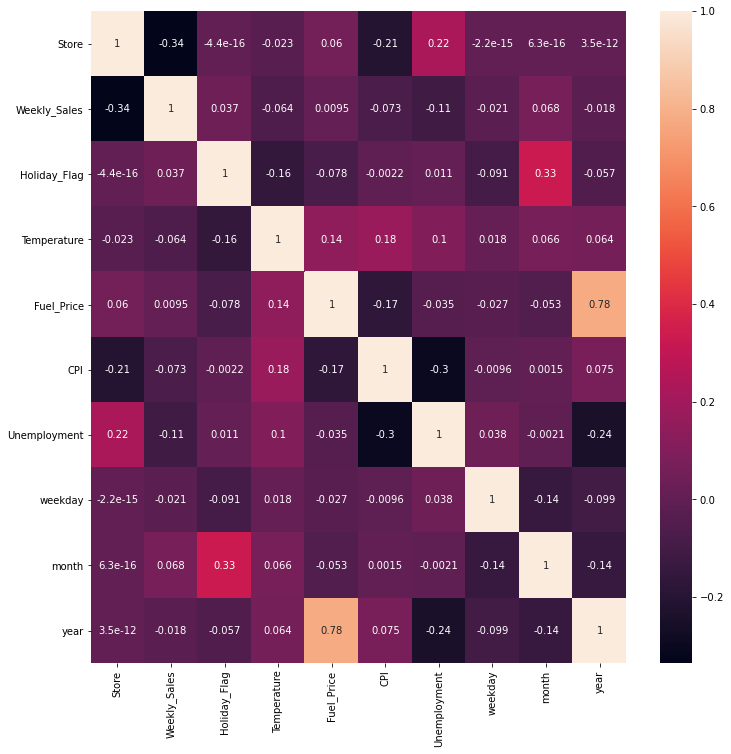

In [21]:
# correlation heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

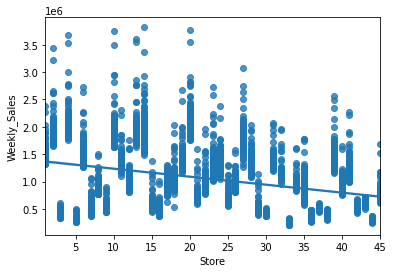

In [22]:
# Regression Analysis between sales and store
sns.regplot('Store', 'Weekly_Sales', df)

- There is a negative relationship between the number of stores and sales. Thus, as the number of stores increases, sales decreases. 

<AxesSubplot:xlabel='Fuel_Price', ylabel='Weekly_Sales'>

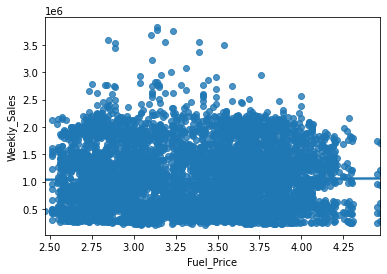

In [23]:
# Regression Analysis between sales and fuel prices
sns.regplot('Fuel_Price', 'Weekly_Sales', df)

- The relationship between sales and fuel price is a positive one. The increase in fuel prices causes a marginal increase in sales. 

<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>

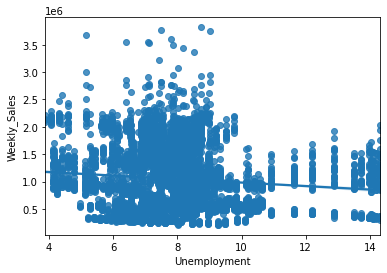

In [24]:
# Regression Analysis between sales and unemployment
sns.regplot('Unemployment', 'Weekly_Sales', df)

- There is a negative relationship between unemployment and sales. Here, as unemployment increases, sales in stores goes down. 

<AxesSubplot:xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

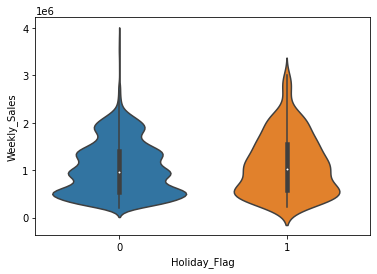

In [25]:
# data visualisation for 
sns.violinplot(x="Holiday_Flag", y="Weekly_Sales", data=df)

- From the visualization above, we can see that on holidays Walmart made lot of sales due to its promotional packages 

### Statistical Inference for variable or feature selection

In [26]:
# Categorical to Dummy Variables
df =  pd.get_dummies(df, columns=["Store", "Holiday_Flag", "weekday", "month", "year"],
                         prefix=["Store", "Holiday_Flag", "weekday", "month", "year"],
                         drop_first=True)
df.head(2)

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Store_2,Store_3,Store_4,Store_5,Store_6,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2011,year_2012
0,1643690.90,42.31,2.572,211.096358,8.106,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1641957.44,38.51,2.548,211.242170,8.106,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
### c. checking for p-value (TESTING FOR STATISTICAL SIGNIFICANCE OF INDEPENDENT VARIABLES for variable selection)
import scipy.stats as stats
df_corr = pd.DataFrame() # Correlation matrix
df_p = pd.DataFrame() # Matrix of p-values
for x in df.columns:   # assuming df as your dataframe name
   for y in df.columns:
      corr = stats.pearsonr(df[x], df[y])
      df_corr.loc[x,y] = corr[0]
      df_p.loc[x,y] = corr[1]

df_p['Weekly_Sales']

Weekly_Sales    0.000000e+00
Temperature     3.007648e-07
Fuel_Price      4.478287e-01
CPI             5.438293e-09
Unemployment    1.344837e-17
                    ...     
month_10        4.628691e-01
month_11        1.384627e-03
month_12        1.932251e-11
year_2011       9.378679e-01
year_2012       2.149766e-01
Name: Weekly_Sales, Length: 69, dtype: float64

- Null hypothesis(Ho) states that slopes of the independent variables are equal to zero.
- Alternate hypothesis(H1) states that slopes of the independent variables are not equal to zero.
- At the confidence level of 95%, we have some predictors not statistically significant and in appropriation, we are to drop these variables. But in reality or the real world, some predictors may not be statistically significant but a high influence on the predicted variable.
- For instance, in the reality, fuel prices do have negative relationship with sales in general with an exception to necessities. But with our dataset, the two variables have a small positive relationship due to the fact that, Walmart as a store deal with groceries which are necessities. No matter how high fuel prices goes up, customers has to eat. Therefore, even though we have a p-value greater than the 0.05 which is statistically not significant, we will still add it to the variables to build our model.

# Model Building and Selection

In [28]:
# Separating target variable and predictors
y = df ['Weekly_Sales']
x = df.drop(['Weekly_Sales'], axis =1)

In [29]:
# Normalization data to bring all values to common scale
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(x).transform(x)
X[0:1]

array([[-0.99513556, -1.71379998,  1.00417522,  0.05696366, -0.15075567,
        -0.15075567, -0.15075567, -0.15075567, -0.15075567, -0.15075567,
        -0.15075567, -0.15075567, -0.15075567, -0.15075567, -0.15075567,
        -0.15075567, -0.15075567, -0.15075567, -0.15075567, -0.15075567,
        -0.15075567, -0.15075567, -0.15075567, -0.15075567, -0.15075567,
        -0.15075567, -0.15075567, -0.15075567, -0.15075567, -0.15075567,
        -0.15075567, -0.15075567, -0.15075567, -0.15075567, -0.15075567,
        -0.15075567, -0.15075567, -0.15075567, -0.15075567, -0.15075567,
        -0.15075567, -0.15075567, -0.15075567, -0.15075567, -0.15075567,
        -0.15075567, -0.15075567, -0.15075567, -0.27420425, -0.25916053,
        -0.11909827, -0.27420425, -1.4291792 , -0.20927403,  3.8586123 ,
        -0.28867513, -0.30265996, -0.32943456,  3.16227766, -0.30265996,
        -0.31622777, -0.30265996, -0.31622777, -0.31622777, -0.25916053,
        -0.28867513, -0.75592895, -0.65574385]])

In [30]:
# splitting data into training and test data at 80% and 20% respectively
from sklearn.model_selection import train_test_split
xm_train, xm_test, ym_train, ym_test = train_test_split(X, y, train_size = 0.8, random_state = 100)

In [31]:
# Checking the size of the split datasets.
print(xm_train.shape)
print(xm_test.shape)
print(ym_train.shape)
print(ym_test.shape)

(5148, 68)
(1287, 68)
(5148,)
(1287,)


### Building model with multiple linear regression

In [32]:
lr = lm.LinearRegression()
lr.fit(xm_train, ym_train)
y_pred = lr.predict(xm_test)
print("mean square error: ", mean_squared_error(ym_test, y_pred))
print("variance or r-squared: ", explained_variance_score(ym_test, y_pred))

mean square error:  20428137697.857597
variance or r-squared:  0.9369193227967636


### Building model with Random Forest Regressor

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(n_estimators=13, random_state=0)
regr.fit(xm_train, ym_train)
y_predicted = regr.predict(xm_test)
print("mean square error: ", mean_squared_error(ym_test, y_predicted))
print("variance or r-squared: ", explained_variance_score(ym_test, y_predicted))

mean square error:  22106176158.002132
variance or r-squared:  0.9316307733217779


### Building model with Decision Tree Regressor

In [34]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(xm_train, ym_train)
ntree = clf.predict(xm_test)
print("mean square error: ", mean_squared_error(ym_test, ntree))
print("variance or r-squared: ", explained_variance_score(ym_test, ntree))

mean square error:  29153475677.897144
variance or r-squared:  0.909920522910795


- The evaluation metrics for choosing the best model are the coefficient determination(r-square or R2) and the mean square error(MSE). The 
- From the three regression models that we built, Multiple Linear regression model comes on top with 0.94 R2 and the least MSE. Followed by Random Forest Regressor with 0.93

## Model Evaluation and Deployment

- Deploying the whole dataset without the target label which we defined as X before splitting.
- Before deploying, the dataset needs to cleaned especially when we ar using a different dataset.
- Multiple Linear Regression and Random Forest Regressor are our best model so we will do further testing before choosing the best model for deployment.


In [35]:
# Linear Regression 
Dep_pred = lr.predict(X)
# Evaluation
print("mean square error: ", mean_squared_error(y, Dep_pred))
print("variance or r-squared: ", explained_variance_score(y, Dep_pred))

mean square error:  21674290012.80561
variance or r-squared:  0.9319444373699328


Text(0, 0.5, 'medv')

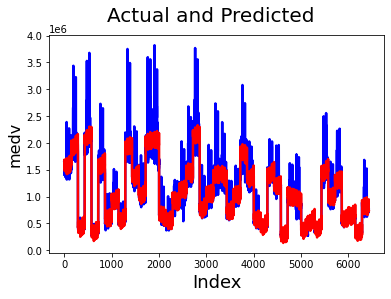

In [36]:
# Actual vs Predicted
c = [i for i in range(1, 6436, 1)]
fig = plt.figure()
plt.plot(c, y, color = "blue", linewidth = 2.5, linestyle = "-" )
plt.plot(c, Dep_pred, color = "red", linewidth = 2.5, linestyle = "-" )
fig.suptitle('Actual and Predicted', fontsize = 20)
plt.xlabel('Index', fontsize = 18)
plt.ylabel('medv', fontsize = 16)

In [37]:
# Random Forest Regressor
Dep = regr.predict(X)
print("mean square error: ", mean_squared_error(y, Dep))
print("variance or r-squared: ", explained_variance_score(y, Dep))

mean square error:  7405914803.582763
variance or r-squared:  0.9767483111738385


Text(0, 0.5, 'medv')

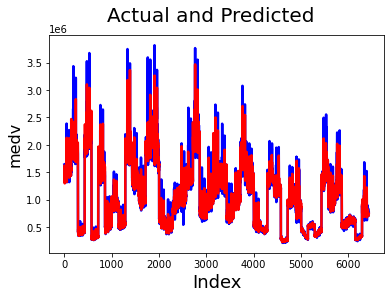

In [38]:
# Actual vs Predicted
c = [i for i in range(1, 6436, 1)]
fig = plt.figure()
plt.plot(c, y, color = "blue", linewidth = 2.5, linestyle = "-" )
plt.plot(c, Dep, color = "red", linewidth = 2.5, linestyle = "-" )
fig.suptitle('Actual and Predicted', fontsize = 20)
plt.xlabel('Index', fontsize = 18)
plt.ylabel('medv', fontsize = 16)

In [39]:
# Top five most influencial variables
feature_importances = pd.DataFrame(regr.feature_importances_, index = x.columns, columns=['importance']).sort_values('importance', ascending=False).head()

feature_importances

,importance
Store_20,0.083221
Store_4,0.079260
Store_14,0.077790
Store_13,0.072711
Store_2,0.069143


- Random Forest Regressor is chosen as the best model. When it comes to the most influential predictors in the predictive model, we have store number 20, leading the race. The top 5 are all coming from the stores which is consider it to be the location. This means that, location of stores is very important.

### Further evaluation using cross validation

In [40]:
# Using cross validation to test the best model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regr, X, y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [41]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [1035915.08587357  465025.7519643   627324.70555449  401929.36291955
  683460.23504477  498576.59739329  546555.37945211  594183.77565415
  534012.58553954  515520.49806791]
Mean: 590250.3977463676
Standard deviation: 167003.49624067484


### Tuning our model before deployment

In [42]:
# Tuning our model
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X, y)
print(grid_search)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')


In [43]:
# obtaining the best parameters
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [44]:
# obtaining the best estimators
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [45]:
# printing all MSE for each parameter combinations
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
     print(np.sqrt(-mean_score), params)

707363.9682454228 {'max_features': 2, 'n_estimators': 3}
647333.1301534609 {'max_features': 2, 'n_estimators': 10}
644714.3516532806 {'max_features': 2, 'n_estimators': 30}
682108.9534297851 {'max_features': 4, 'n_estimators': 3}
661074.4184983565 {'max_features': 4, 'n_estimators': 10}
635118.4058290222 {'max_features': 4, 'n_estimators': 30}
700301.7548111737 {'max_features': 6, 'n_estimators': 3}
648671.2129318004 {'max_features': 6, 'n_estimators': 10}
639212.3705113776 {'max_features': 6, 'n_estimators': 30}
628562.0899897071 {'max_features': 8, 'n_estimators': 3}
649698.3023525603 {'max_features': 8, 'n_estimators': 10}
627033.058755965 {'max_features': 8, 'n_estimators': 30}
740036.0657179126 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
662645.3937415464 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
705099.1966744558 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
649099.6972486237 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

- From the above figures, we have parameters 6 and n_estimator 30

In [46]:
# final model with Random Forest Regressor
regr = RandomForestRegressor(max_features=6, n_estimators=30, random_state=0)
regr.fit(xm_train, ym_train)
Deploy_pred = regr.predict(X)
print("mean square error: ", mean_squared_error(y, Deploy_pred))
print("variance or r-squared: ", explained_variance_score(y, Deploy_pred))

mean square error:  6806293107.689146
variance or r-squared:  0.9786275614529636


- The new r-squared for the model is 0.98 iwhich is closer to 1 with MSE 6806293107.689146

### You might want to have an idea of how precise this estimate is. For this, you can compute a 95% confidence interval for the generalization error using scipy.stats.t.interval():

In [47]:
from scipy import stats
confidence = 0.95
squared_errors = (Dep - y) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                          loc=squared_errors.mean(),
                          scale=stats.sem(squared_errors)))

array([77805.90260497, 93584.5667137 ])

# Findings and Recommendations

- (i) Our first hypothesis is, does these independent variables or predictors have influence on sales that is the dependent or target variable which will enable us to make better decisions. From the regression analysis, our model built showed influence or relationship between the predictors and the response(sales). Let us first talk about store or location and sales. There exist a negative relationship between locations or stores and sales. Meaning, as the number of locations or stores increases, sales decreases and vice versa. In reality, we expect that the increase in the locations or stores should bring in more sales. But perhaps, these stores are not located at the right places. For instance, a store in the middle of a desert will not make sales more than a store in New York city. Other predictors with negative relationships with sales are Unemployment, consumer price index(CPI), Temperature etc. We can also talk about the relationship between fuel prices and sales. Our analysis showed a positive relationship between fuel price and sales. In general, an increase fuel price causes prices of items to go up. In view of this phenomenon, we would expect customers or consumers decrease purchases. But this is not the case, consumers are purchasing at a marginal rate. It is not surprising since Walmart is an groceries store which deals with necessities. We need groceries to survive, therefore an increase in fuel prices will not stop consumers from buy from Walmart. 

- The second hypothesis states that the predictors or independent variables have a high chance of giving us a good predictive model in predicting sales. Our predictive modeling results showed a higher coefficient determination(R2). Meaning, the predictors are good in predicting sales. The top five independent variables that are important in predicting sales are all from locations or stores. This tells us that, location is very important in predicting sales. 

### Recommendation
- Our finding highlighted an increase in stores causing a decrease in sales. In view of this, many factors can account for this phenomenon. If stores are located in isolated areas, then these stores needs to be looked at. Mismanagement can also be a factor causing stores not to perform well. It was not surprising to see some stores at the bottom of the most influential predictors in predicting sales. Such stores include, 34, 26, 12 and 40.
- Another findings is holidays promotions worked perfectly well and there is a positive relationship existing between sales and holidays. Therefore, on holidays stores must be stocked in order not to run out.
- With unemployment, the negative relationship with sales should give a signal that anytime consumers or customers are employed, their purchasing power will go up thereby increasing the demand for items. Stores must stock up with items anytime unemployment index goes down.
- The increase in fuel price should not scare store managers in stocking up since Walmart sells necessities. Increase in fuel prices does not affect groceries since consumer needs groceries to survive.

### Future work on the dataset
- We will be using deep learning in predicting sales.